# Explore data base from Heidi Sevestre that they use in there paper

Sevestre and Benn, 2015: https://www.cambridge.org/core/journals/journal-of-glaciology/article/climatic-and-geometric-controls-on-the-global-distribution-of-surgetype-glaciers-implications-for-a-unifying-model-of-surging/34D15501CBBF803608401FEAA6B0FC61
The excel spreadsheet has been sent by Doug Benn on request. 

Technical not ecan be found here: http://glims.net/RGI/00_rgi60_TechnicalNote.pdf

The Randoph data base can be found here: http://www.glims.org/About/

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
heidi = pd.read_excel('/home/colili/Documents/PhD/project_john/data_set/data_sevestre_benn/Surge_database_heidi.xlsx')

# lat and lon import as non-floats
heidi['CENLAT'] = heidi.CENLAT.astype(float)
heidi['CENLON'] = heidi.CENLON.astype(float)

print(heidi.shape)
# some rows have only nans for relevant data
heidi.dropna(inplace=True)
print(heidi.shape)

# create a column that tells us if a glacier is surgetype or not based on if it has observed surges
heidi['surgetype'] = heidi.apply(lambda x: 1 if x['Number of dated surges'] > 0 else 0, axis=1)

print('there are', heidi.RGI_ID.unique().shape, 'unique glaciers in the data set based on RGI_id')

print('there are', heidi[['Country', 'RGI_ID', 'GLIMS_ID', 
       'Number of dated surges', 'CENLAT', 'CENLON', 'AREA', 'ZMIN', 'ZMAX',
       'ZMED', 'SLOPE', 'ASPECT', 'LMAX']].drop_duplicates().shape, 'unique rows in the data set when removing the glacier name.')

# we need an actual thickness, this is a bad estimate
heidi['thickness'] = heidi.ZMAX - heidi.ZMIN

(2280, 14)
(2180, 14)
there are (1503,) unique glaciers in the data set based on RGI_id
there are (1669, 13) unique rows in the data set when removing the glacier name.


### Read the thickness from the glims database

In [3]:
thickness = pd.read_csv('/home/colili/Documents/PhD/project_john/data_set/glathida-3.1.0/data/T.csv')

In [4]:
heidi.groupby('RGI_ID').filter(lambda x: len(x)>1)

,Country,RGI_ID,GLIMS_ID,Glacier_Name,Number of dated surges,CENLAT,CENLON,AREA,ZMIN,ZMAX,ZMED,SLOPE,ASPECT,LMAX,surgetype,thickness
4,Alaska,RGI50-01.00037,G213472E63469N,Black Rapids,1,63.469173,-146.528168,234.583,722.0,3081.0,1841.0,12.0,30.0,41911.0,1,2359.0
5,Alaska,RGI50-01.00037,G213472E63469N,Black rapids north trib 1,0,63.469173,-146.528168,234.583,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
6,Alaska,RGI50-01.00037,G213472E63469N,Black rapids north trib 2,0,63.469173,-146.528168,234.583,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
7,Alaska,RGI50-01.00037,G213472E63469N,Black rapids north trib 3,0,63.469173,-146.528168,234.583,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
8,Alaska,RGI50-01.00037,G213472E63469N,Black rapids north trib 4,0,63.469173,-146.528168,234.583,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,Karakoram,RGI50-14.10672,G076225E36119N,Unnamed 02,0,36.119000,76.224900,57.580,4410.0,7010.0,5641.0,26.7,34.0,15573.0,0,2600.0
2177,Karakoram,RGI50-14.10672,G076225E36119N,Unnamed 03,0,36.119000,76.224900,57.580,4410.0,7010.0,5641.0,26.7,34.0,15573.0,0,2600.0
2178,Karakoram,RGI50-14.10672,G076225E36119N,Unnamed 07,1,36.119000,76.224900,57.580,4410.0,7010.0,5641.0,26.7,34.0,15573.0,1,2600.0
2191,Chile,RGI50-17.14038,G290243E33492S,Glacier B (south of Tupungato glacier),1,-33.491500,-69.756700,69.313,3420.0,6536.0,4588.0,18.4,120.0,16071.0,1,3116.0


In [5]:
heidi[heidi.RGI_ID=='RGI50-01.00037']

,Country,RGI_ID,GLIMS_ID,Glacier_Name,Number of dated surges,CENLAT,CENLON,AREA,ZMIN,ZMAX,ZMED,SLOPE,ASPECT,LMAX,surgetype,thickness
4,Alaska,RGI50-01.00037,G213472E63469N,Black Rapids,1,63.469173,-146.528168,234.583000,722.0,3081.0,1841.0,12.0,30.0,41911.0,1,2359.0
5,Alaska,RGI50-01.00037,G213472E63469N,Black rapids north trib 1,0,63.469173,-146.528168,234.583000,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
6,Alaska,RGI50-01.00037,G213472E63469N,Black rapids north trib 2,0,63.469173,-146.528168,234.583000,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
7,Alaska,RGI50-01.00037,G213472E63469N,Black rapids north trib 3,0,63.469173,-146.528168,234.583000,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
8,Alaska,RGI50-01.00037,G213472E63469N,Black rapids north trib 4,0,63.469173,-146.528168,234.583000,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
9,Alaska,RGI50-01.00037,G213472E63469N,Black rapids north trib 5,0,63.469173,-146.528168,234.583000,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
10,Alaska,RGI50-01.00037,G213472E63469N,Black rapids S1 Trib,0,63.469173,-146.528168,234.583000,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
11,Alaska,RGI50-01.00037,G213472E63469N,Black rapids S2 Trib,0,63.469173,-146.528168,234.583000,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
12,Alaska,RGI50-01.00037,G213472E63469N,Black rapids S3 Trib,0,63.469153,-146.528101,234.582911,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0
13,Alaska,RGI50-01.00037,G213472E63469N,Black rapids S4 Trib,0,63.469173,-146.528168,234.583000,722.0,3081.0,1841.0,12.0,30.0,41911.0,0,2359.0


In [6]:
thickness.shape

(5141, 26)

In [7]:
thickness.GLACIER_DB.unique()

array(['WGI', 'FOG', nan, 'OTH', 'RGI', 'GLIMS'], dtype=object)

### Attach Heidi data base (surge) and add the thicknes

In [8]:
heidi['GLACIER_ID'] = heidi.RGI_ID

In [9]:
thicc = thickness[thickness.GLACIER_DB=='RGI'].set_index('GLACIER_ID')
everything = thicc.merge(heidi.set_index('GLACIER_ID'))

In [10]:
everything

,GlaThiDa_ID,POLITICAL_UNIT,GLACIER_NAME,GLACIER_DB,LAT,LON,SURVEY_DATE,ELEVATION_DATE,AREA,MEAN_SLOPE,...,CENLAT,CENLON,ZMIN,ZMAX,ZMED,SLOPE,ASPECT,LMAX,surgetype,thickness
0,2076,SJ,SVEIGBREEN,RGI,78.1071,17.6978,20140407.0,20140407.0,28.590,3.0,...,38.487855,72.458335,3524.0,6348.0,4976.0,18.9,172.0,11710.0,0,2824.0
1,2076,SJ,SVEIGBREEN,RGI,78.1071,17.6978,20140407.0,20140407.0,28.590,3.0,...,38.487855,72.458335,3524.0,6348.0,4976.0,18.9,172.0,11710.0,0,2824.0
2,2076,SJ,SVEIGBREEN,RGI,78.1071,17.6978,20140407.0,20140407.0,28.590,3.0,...,38.487855,72.458335,3524.0,6348.0,4976.0,18.9,172.0,11710.0,0,2824.0
3,2076,SJ,SVEIGBREEN,RGI,78.1071,17.6978,20140407.0,20140407.0,28.590,3.0,...,38.487855,72.458335,3524.0,6348.0,4976.0,18.9,172.0,11710.0,0,2824.0
4,2188,SJ,BRAASVELLBREEN,RGI,79.4014,23.5121,19830425.0,NaN,1095.853,4.0,...,79.401400,23.512100,1.0,926.0,271.0,4.4,184.0,50954.0,1,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2474,SJ,FJORTENDE JULIBREEN,RGI,79.1294,12.2577,19830425.0,NaN,76.334,10.0,...,79.129400,12.257700,18.0,1171.0,466.0,10.1,285.0,19383.0,0,1153.0
142,2482,SJ,NEGRIBREEN,RGI,78.6798,18.4735,19800430.0,NaN,963.857,5.0,...,78.679800,18.473500,16.0,1149.0,506.0,5.0,129.0,50824.0,1,1133.0
143,2483,SJ,NEGRIBREEN,RGI,78.6798,18.4735,19829999.0,NaN,963.857,5.0,...,78.679800,18.473500,16.0,1149.0,506.0,5.0,129.0,50824.0,1,1133.0
144,2484,SJ,NEGRIBREEN,RGI,78.6798,18.4735,19830425.0,NaN,963.857,5.0,...,78.679800,18.473500,16.0,1149.0,506.0,5.0,129.0,50824.0,1,1133.0


In [11]:
everything.columns

Index(['GlaThiDa_ID', 'POLITICAL_UNIT', 'GLACIER_NAME', 'GLACIER_DB', 'LAT',
       'LON', 'SURVEY_DATE', 'ELEVATION_DATE', 'AREA', 'MEAN_SLOPE',
       'MEAN_THICKNESS', 'MEAN_THICKNESS_UNCERTAINTY', 'MAXIMUM_THICKNESS',
       'MAX_THICKNESS_UNCERTAINTY', 'SURVEY_METHOD', 'SURVEY_METHOD_DETAILS',
       'NUMBER_OF_SURVEY_POINTS', 'NUMBER_OF_SURVEY_PROFILES',
       'TOTAL_LENGTH_OF_SURVEY_PROFILES', 'INTERPOLATION_METHOD',
       'INVESTIGATOR', 'SPONSORING_AGENCY', 'REFERENCES', 'DATA_FLAG',
       'REMARKS', 'Country', 'RGI_ID', 'GLIMS_ID', 'Glacier_Name',
       'Number of dated surges', 'CENLAT', 'CENLON', 'ZMIN', 'ZMAX', 'ZMED',
       'SLOPE', 'ASPECT', 'LMAX', 'surgetype', 'thickness'],
      dtype='object')

In [12]:
everything.GLACIER_NAME.unique()

array(['SVEIGBREEN', 'BRAASVELLBREEN', 'AUSTFONNA BASIN 3', 'RIJPBREEN',
       'CLASEBREEN: GLITNEFONNA NE', 'SCOTTBREEN', 'ST OLGAFJELLET',
       'RECHERCHEBREEN', 'FINSTERWALDERBREEN', 'PENCKBREEN',
       'AUSTRE TORELLBREEN', 'VALLAAKRABREEN', 'RAGNA MARIEBREEN',
       'INGLEFIELDBREEN', 'ARNESENBREEN', 'BERESNIKOVBREEN', 'SKOBREEN',
       'SCHEELEBREEN', 'KVALBREEN', 'INDREBOEBREEN', 'SVALBREEN',
       'STRONGBREEN', 'STEENSTRUPBREEN', 'VESTRE TORELLBREEN',
       'EIDEMBREEN', 'NORDSYSSELBREEN', 'THOMSONBREEN', 'KARIBREEN',
       'SPAELBREEN', 'JEMELIANOVBREEN', 'NATHORSTBREEN', 'HORNBREEN',
       'MARTHABREEN', 'HELSINGBORGBREEN', 'NUDDBREEN', 'NANSENBREEN',
       'BOREBREEN', 'WAHLENBERGBREEN', 'MIDTRE LOVENBREEN',
       'AAVATSMARKBREEN', 'AUSTRE BROEGGERBREEN', 'UVERSBREEN',
       'SEFSTROEMBREEN', 'HOLMSTROEMBREEN', 'BLOMSTRANDBREEN',
       'NORDENSKIOLDBREEN', 'PALANDERISEN', 'AASGARDFONNA NW',
       'KANTBREEN', 'FREEMANBREEN', 'KONG JOHANS BRE', 'ALFARVEGEN',


<AxesSubplot:>

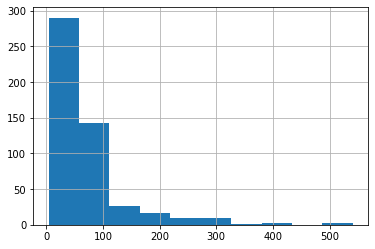

In [13]:
thickness.MEAN_THICKNESS.hist()

In [14]:
thickness[thickness.GLACIER_DB=='RGI'].MEAN_THICKNESS.unique()

array([22., 85., 74., 23., 16., 15., 58., 29., 41., 65., nan, 27., 76.])

### Thickness coming from raw data (GPR)

In [15]:
thick3 = pd.read_csv('/home/colili/Documents/PhD/project_john/data_set/glathida-3.1.0/data/TTT.csv')

/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2,4,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
thick3.dtypes

GlaThiDa_ID                int64
POLITICAL_UNIT            object
GLACIER_NAME              object
SURVEY_DATE              float64
PROFILE_ID                object
POINT_ID                  object
POINT_LAT                float64
POINT_LON                float64
ELEVATION                float64
THICKNESS                  int64
THICKNESS_UNCERTAINTY    float64
DATA_FLAG                float64
REMARKS                   object
dtype: object

In [17]:
thick3[thick3.GlaThiDa_ID==2076].THICKNESS

59236     3
59237     6
59238    10
59239    12
59240    14
         ..
61477    44
61478    41
61479     4
61480     3
61481     2
Name: THICKNESS, Length: 2246, dtype: int64

In [18]:
thick3[thick3.GlaThiDa_ID==2076]

,GlaThiDa_ID,POLITICAL_UNIT,GLACIER_NAME,SURVEY_DATE,PROFILE_ID,POINT_ID,POINT_LAT,POINT_LON,ELEVATION,THICKNESS,THICKNESS_UNCERTAINTY,DATA_FLAG,REMARKS
59236,2076,SJ,SVEIGBREEN,20140407.0,NaN,1,78.100242,17.972760,71.0,3,3.0,NaN,NaN
59237,2076,SJ,SVEIGBREEN,20140407.0,NaN,2,78.100230,17.972152,73.0,6,3.0,NaN,NaN
59238,2076,SJ,SVEIGBREEN,20140407.0,NaN,3,78.100213,17.971593,75.0,10,3.0,NaN,NaN
59239,2076,SJ,SVEIGBREEN,20140407.0,NaN,4,78.100204,17.971007,77.0,12,3.0,NaN,NaN
59240,2076,SJ,SVEIGBREEN,20140407.0,NaN,5,78.100192,17.970382,79.0,14,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61477,2076,SJ,SVEIGBREEN,20140407.0,NaN,2242,78.069942,17.619493,545.0,44,3.0,NaN,NaN
61478,2076,SJ,SVEIGBREEN,20140407.0,NaN,2243,78.069995,17.619953,547.0,41,3.0,NaN,NaN
61479,2076,SJ,SVEIGBREEN,20140407.0,NaN,2244,78.095271,17.598225,520.0,4,3.0,NaN,NaN
61480,2076,SJ,SVEIGBREEN,20140407.0,NaN,2245,78.095380,17.598358,524.0,3,3.0,NaN,NaN


### Map the GPR lines

In [19]:
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

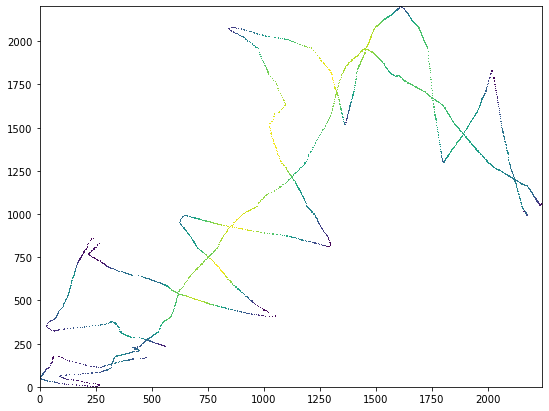

In [22]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.pcolormesh(thick3[thick3.GlaThiDa_ID==2076].pivot_table(index='POINT_LAT', columns='POINT_LON', values='THICKNESS').values)

/home/john/anaconda3/envs/glaciers/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


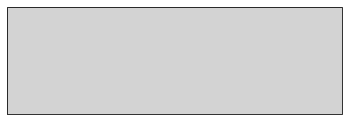

In [31]:

proj = ccrs.Miller()                          # the projection you want to use, many are supported
    
ax = plt.axes(projection=proj)                  # sets the projection

ax.add_feature(cartopy.feature.OCEAN            # add ocean feature
               , zorder=0                       # layer where ocean should plot; 0 is base   
               , facecolor='w'                  # color of the ocean
              )           

ax.add_feature(cartopy.feature.LAND             # add continent feature
               , zorder=0                       # layer where continent should plot; 0 is base
               , edgecolor='black'              # coastline color
               , facecolor='lightgray'          # continent color
              )               

ax.coastlines(resolution='50m')                # the level of resolution to render the drawings, 
                                                # see documentation for more details
llcrnrlon, llcrnrlat = (thick3[thick3.GlaThiDa_ID==2076].POINT_LON.min(), thick3[thick3.GlaThiDa_ID==2076].POINT_LAT.min())                       # lower left corner longitude/latitude
urcrnrlon, urcrnrlat = (thick3[thick3.GlaThiDa_ID==2076].POINT_LON.max(), thick3[thick3.GlaThiDa_ID==2076].POINT_LAT.max())   
ax.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat]) 